Approach:

1. stricte equal:
    - title equal
2. field based: if (year, title) equal, journal, authors

In [13]:
import crossrefexp as exp

In [14]:
store = exp.MetaDataStore('data/cache.pickle')

default pickle location set to data/cache.pickle


growth achieved - 33 nodes in the graph. The last generation number is 1.
Requesing 1 metadata:
0 metadata returned for 0 asked
data/cache.pickle saved.
growth achieved - 151 nodes in the graph. The last generation number is 2.
Requesing 106 metadata:
Query performed in 1.215766 s. (92 doi)
Query performed in 0.307546 s. (14 doi)
106 metadata returned for 106 asked
data/cache.pickle saved.
growth achieved - 625 nodes in the graph. The last generation number is 3.
graphs/Cochard2010_gen3_top2.svg  saved


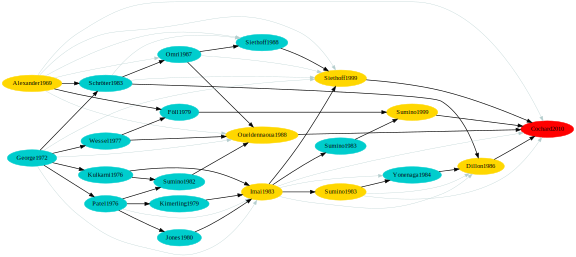

In [20]:
doi = '10.1063/1.3284082'

# Build the graph and everything:
gr = store.get_refgraphviz( doi, gen=3, top=2, draw_secondary_links=True )
gr

In [21]:
refs_without_doi = []

for metadata in iter( store.values() ):
    
    refs_without_doi.extend( [ref for ref in metadata.get('reference', []) 
                        if "DOI" not in ref] )
    
print(len(refs_without_doi))

1151


In [22]:
couples = [(i, j) for i in range(len(refs_without_doi)) for j in range(i)]

In [24]:
matches = []

for i, j in couples:
    dicoA, dicoB = refs_without_doi[i], refs_without_doi[j]
    
    if 'article-title' not in dicoA or 'article-title' not in dicoB:
        continue
        
    if dicoA['article-title'].lower() == dicoB['article-title'].lower():
        matches.append((dicoA, dicoB))
    
print(len(matches))

0


In [19]:
matches

[]

In [7]:
def strict_merge(dictA, dictB):
    common_keys = dictA.keys() & dictB.keys()
    merged_dict = {key:dictA[key] for key in common_keys if dictA[key] == dictB[key]}
    disagree = {key for key in common_keys if dictA[key] != dictB[key]}
    return merged_dict, disagree

In [9]:
len(couples)

8002000

In [86]:
' '.join(matches[0][0].values())

'Apidologie Calis1999 1999 30 111'

https://search.crossref.org/references

In [34]:
unstructured_refs = [ ref["unstructured"] for ref in refs_without_doi[:40] if "unstructured" in ref ]
print(
    '\n'.join( ['{}. {}'.format(k, ref) for k, ref in enumerate(unstructured_refs)] )
)

0. Alefeld, G., Filloux, J. and Harper, H. 1968.Proceedings of the Batelle Colloquium on Dislocation Dynamics, Edited by: Rosenfield, A. R., Hahn, G. T., Bement, A. L. and Jaffee, R. A. 191New York: McGraw-Hill.
1. Lücre, K. and Schlipf, J. 1968.The Interactions between Dislocations and Point Defects, Edited by: Eyre, B. L. Vol. 1, 118Aere: Harwell.
2. Winkler-Gniewek, W., Schlipf, J. and Schindlmayr, R. 1973. Proceedings of the Fifth International Conference on Internal Friction and Ultrasonic Attenuation in Crystalline Solids. 1973. Edited by: Lenz, D. and Lücke, K. Vol. II, pp.246Berlin: Springer-Verlag.
3. and , Annual Review of Materials Science, in the press.
4. Thesis, Göttingen 1971;
5. , and , private communication.
6. private communication.
7. Thèse de Docteur Ingénieur, Nancy 1972.
8. to be published.
9. private communication.
10. and , Theory of Dislocations, McGraham-Hill Book Co., New York 1968.
11. Diploma Thesis, Göttingen 1972.
12. Cottrell, A. H. 1948.Report on the St

https://www.crossref.org/labs/resolving-citations-we-dont-need-no-stinkin-parser/

In [36]:
import requests
import urllib.parse

In [67]:
ref_text = unstructured_refs[2]
print(ref_text)

Winkler-Gniewek, W., Schlipf, J. and Schindlmayr, R. 1973. Proceedings of the Fifth International Conference on Internal Friction and Ultrasonic Attenuation in Crystalline Solids. 1973. Edited by: Lenz, D. and Lücke, K. Vol. II, pp.246Berlin: Springer-Verlag.


In [68]:
url = "https://api.crossref.org/works"

params = {'mailto': 'heelo@marvelusMail.com',
          'query.bibliographic':ref_text}

response = requests.get(url, params=params)
response.elapsed

datetime.timedelta(0, 2, 696476)

In [69]:
r = response.json()
items = r['message']['items']

print(len(items))

sorted( items, key=lambda x:x['score'], reverse=True )[0]

20


{'DOI': '10.1007/978-3-642-95275-3_63',
 'ISBN': ['9783540074366', '9783642952753'],
 'URL': 'http://dx.doi.org/10.1007/978-3-642-95275-3_63',
 'author': [{'affiliation': [],
   'family': 'Winkler-Gniewek',
   'given': 'Wladis',
   'sequence': 'first'},
  {'affiliation': [],
   'family': 'Schlipf',
   'given': 'J.',
   'sequence': 'additional'},
  {'affiliation': [],
   'family': 'Schindlmayr',
   'given': 'R.',
   'sequence': 'additional'}],
 'container-title': ['Internal Friction and Ultrasonic Attenuation in Crystalline Solids'],
 'content-domain': {'crossmark-restriction': False, 'domain': []},
 'created': {'date-parts': [[2012, 4, 8]],
  'date-time': '2012-04-08T22:36:29Z',
  'timestamp': 1333924589000},
 'deposited': {'date-parts': [[2012, 4, 8]],
  'date-time': '2012-04-08T22:36:46Z',
  'timestamp': 1333924606000},
 'indexed': {'date-parts': [[2018, 5, 5]],
  'date-time': '2018-05-05T07:34:44Z',
  'timestamp': 1525505684360},
 'is-referenced-by-count': 0,
 'isbn-type': [{'type':

{'DOI': '10.1126/science.162.3859.1259-a',
 'ISSN': ['0036-8075', '1095-9203'],
 'URL': 'http://dx.doi.org/10.1126/science.162.3859.1259-a',
 'author': [{'affiliation': [],
   'family': 'Durant',
   'given': 'F. C.',
   'sequence': 'first'}],
 'container-title': ['Science'],
 'content-domain': {'crossmark-restriction': False, 'domain': []},
 'created': {'date-parts': [[2006, 10, 5]],
  'date-time': '2006-10-05T11:50:27Z',
  'timestamp': 1160049027000},
 'deposited': {'date-parts': [[2016, 12, 23]],
  'date-time': '2016-12-23T17:04:03Z',
  'timestamp': 1482512643000},
 'indexed': {'date-parts': [[2018, 5, 3]],
  'date-time': '2018-05-03T04:41:05Z',
  'timestamp': 1525322465348},
 'is-referenced-by-count': 1,
 'issn-type': [{'type': 'print', 'value': '0036-8075'},
  {'type': 'electronic', 'value': '1095-9203'}],
 'issue': '3859',
 'issued': {'date-parts': [[1968, 12, 13]]},
 'journal-issue': {'issue': '3859',
  'published-print': {'date-parts': [[1968, 12, 13]]}},
 'language': 'en',
 'li

In [54]:
response.url

'https://api.crossref.org/works?mailto=heelo%40marvelusMail.com&query.bibliographic=Alefeld%2C+G.%2C+Filloux%2C+J.+and+Harper%2C+H.+1968.Proceedings+of+the+Batelle+Colloquium+on+Dislocation+Dynamics%2C+Edited+by%3A+Rosenfield%2C+A.+R.%2C+Hahn%2C+G.+T.%2C+Bement%2C+A.+L.+and+Jaffee%2C+R.+A.+191New+York%3A+McGraw-Hill.'

In [57]:
for item in items:
    print(item['score'])

34.021866
32.216164
30.611364
30.238432
30.238432
30.199623
30.147617
30.147617
30.092163
28.986786
28.199787
28.199787
27.746643
27.399408
27.399408
27.399408
27.399408
27.399408
27.399408
27.399408
